<a href="https://colab.research.google.com/github/hwarang97/Image_classification/blob/main/lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='sigmoid',input_shape=(28,28,1)))
model.add(keras.layers.AveragePooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(16, kernel_size=5, padding='valid', activation='sigmoid'))
model.add(keras.layers.AveragePooling2D(pool_size=(2)))

In [8]:
model.add(keras.layers.Conv2D(120, kernel_size=5, padding='valid', activation='sigmoid'))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dense (Dense)               (None, 1, 1, 100)         1

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') 
# sparse를 쓰지 않으면 오류 발생(목표값이 원핫인코딩되지 않아서 sparse를 써줘야함 )
# (오류내용 빨리 검색해보기. 생각보다 나랑 같은 문제를 겪은 사람이 많음)

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lenet_5.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [12]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 7ms/step - loss: 0.9063 - accuracy: 0.1200 - val_loss: 0.3053 - val_accuracy: 0.1248
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2272 - accuracy: 0.1262 - val_loss: 0.1764 - val_accuracy: 0.1258
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1499 - accuracy: 0.1268 - val_loss: 0.1520 - val_accuracy: 0.1259
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1119 - accuracy: 0.1273 - val_loss: 0.1104 - val_accuracy: 0.1265
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0907 - accuracy: 0.1281 - val_loss: 0.0851 - val_accuracy: 0.1268
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0756 - accuracy: 0.1280 - val_loss: 0.0977 - val_accuracy: 0.1268
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0671 - accuracy: 0.1277 - val_loss: 0.0797 - val_accuracy

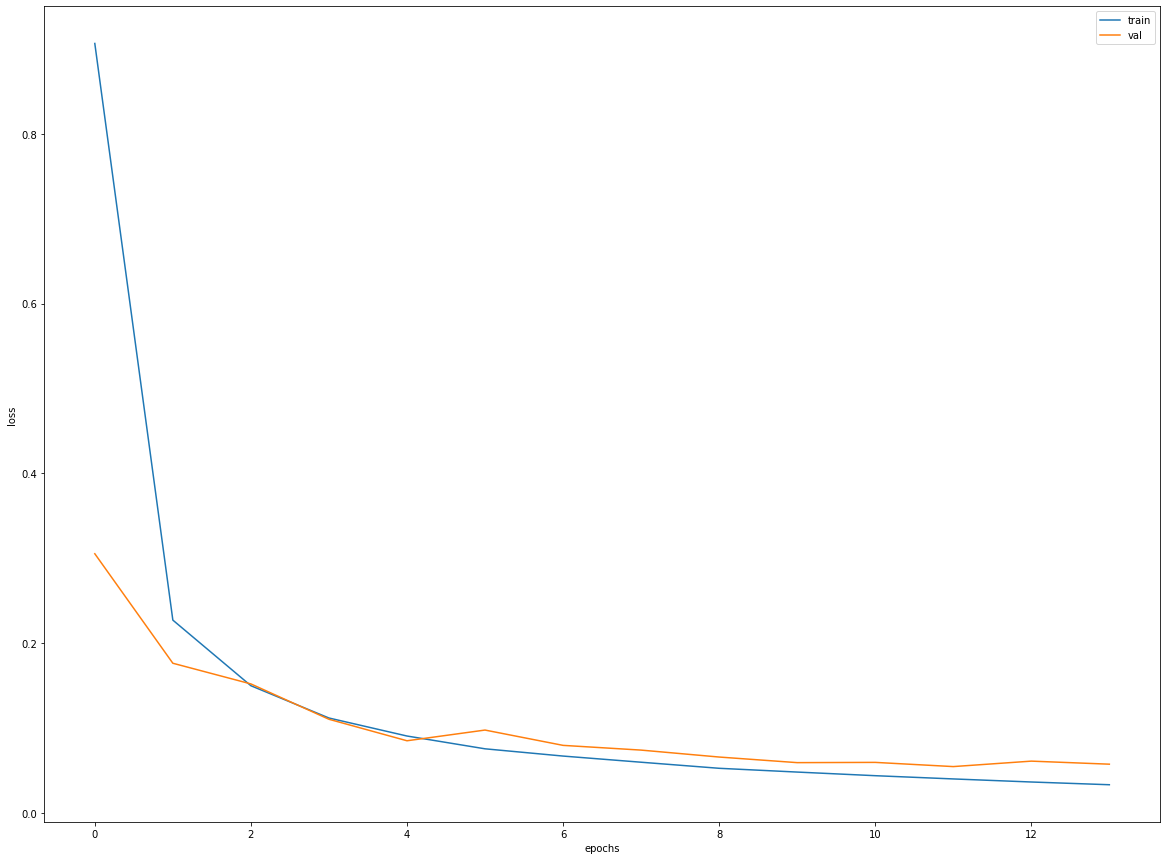

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.1227


[0.04661138728260994, 0.1227075383067131]